# Natural Language vs. Programming Language  <br>

- **Programming Language** : 컴파일러 or 인터프리터에 의해 번역될 것을 염두에 두고 작성하는 언어.
- **Natural Language** : 우리들이 쓰는 언어. 사람들이 정보를 공유하고자 할 때 사용하는 언어. 컴파일러나 인터프리터 X.

<br>

    NLP : CS, AI의 연구분야. 자연어를 컴퓨터가 배우고 이해할 수 있는 자료로 변환하는 작업.
          이를 통해 자연어 문장을 생성하는데 쓰이기도 함.
           
<br>       
       
- 자연어를 처리하는 시스템을 파이썬 인터프리터와 비슷한 일종의 자연어 해석기 라고도 볼 수 있음.
- 이런 자연어 처리 시스템을 **pipeline**이라고 부를 떄가 많음. 다수의 처리 단계가 연결된 형태라서...
- 텍스트 만을 주로 다룸. spoken 된 문장은 X. 음성인식 or 음성-텍스트 변환(STT)기술이 필요.

## Mathmetics in NLP

<br>

- 자연어에서 구조적인 수치 자료(벡터)를 추출했다면, 여기에 수학과 ML의 다양한 기법을 적용할 수 있음.
- 예전부터 사용해왔던 3차원 물체를 2차원 평면에 투영하는 것과 같은 선형대수 기법들이 포함.
    - **의미 분석과 통계를 섞는 셈**. 자연어의 중의성을 어느정도 해석할 수 있게 됨.
- **자연어에서 정보를 추출하는 것은 컴파일러를 만드는 것과는 다름.**
    - 기존 컴파일러에서 처럼 논리규칙들로 이뤄진 **중첩 체계 사용 X.**
    - 대신 **단어들 사이의 통계적 관계를 활용.**
        - 문법 규칙의 일부는 FSM으로 구현이 가능, 정규 문법은 정규표현식으로 표현 가능.
        - Python엔 정규 표현식 FSM을 실행하는 대표 모듈 regex와 내장 모듈 re가 있음.
- 하지만 이것만으로 해결하기 어려운게 있음. 사람의 마음을 아는 것. theory of mind.
    - 'Good Morning'은 아침에 관한 표현이라기 보단 화자의 기분 및 다른 사람과의 교류를 원하는 마음가짐을 반영하고 있음.
    - 컴퓨터가 이걸 어떻게 아느냐...
    - NLP를 위한 Ontology가 필요.

**회전식 자물쇠는 사실 간단한 언어처리 기계.**  <br>
- 사람의 언언어는 이해하지 못하지만 자물쇠 언어는 이해하고 있음.
    - 사용자가 말해주는 숫자 조합 == 비밀번호 == 자물쇠 언어 (정규표현식)
    - **주어진 문장(조합)**이 **특별히 의미있는 문장(비밀번호)과 일치하는지 판정**해 그에 맞는 **응답**을 제시. 

## Regular Expression  <br>
- regex. 특별한 종류의 형식 언어 문법을 사용하는 하나의 표현 식.
- 길고 복잡한 정규 문법 규칙이라도 regex를 통해 짧고 간결하게 표현할 수 있음.
- regex 대부분은 특정 패턴에 부합하는 문자열을 찾는데 사용.
    - 챗봇은 사용자가 입력한 문장에서 자신이 응답할 수 있는 문구를 찾는데 regex 검색을 사용.
- 이런 언어들을 처리하는 프로그램을 FSM 또는 DFA라고 부름.

# Example

<br>

- 간단한 pattern matching chatbot을 만들어보자.
- FSM or regex를 쓰는 chatbot은 정규 언어를 이해할 수 있음.

In [3]:
import re # regex사용을 위한 모듈. regex 모듈은 얘보다 강한데 나중에 쓸것.

# *는 그 앞의 글자가 0회 이상 나타났는지 확인. (안나와도 되고, 여러번 나오도 됨.)
# 아래 정규식은 hi, hello, hey로 시작하고 
# 그 다음 임의 개수의 빈칸([ ])들과 임의 개수의 영문자들이 오는 말과 부합하게 됨.
r = '(hi | hello | hey)[ ]*([a-z]*)'

re.match(r, 'Hello, Rosa', flags=re.IGNORECASE) # re.IGNORECASE로 대소문자 구분 무시.

In [4]:
re.match(r, 'hi ho, hi ho, how are youuuu', flags=re.IGNORECASE)

<re.Match object; span=(0, 5), match='hi ho'>

- 정규 표현식에서 [ ] 는 매칭 가능한 문자들의 종류를 뜻하는 character class를 지정하는데 사용.
- ' * ' 는 그 문자 부류에 속하는 문자가 0번 이상 나타날 수 있음을 의미.
- 위 표현식으론 매칭할 수 있는 단어가 한정되어 있음. 표현식을 좀 더 다듬어보자.

In [18]:
r = r"[^a-z]*([y]o|[h']?ello|ok|hey|(good[ ])?(morn[gin']{0,3}|"r"afternoon|even[gin']{0,3}'))[\s,;:]{1,3}([a-z]{1,20})"
re_greeting = re.compile(r, flags=re.IGNORECASE) # 미리 컴파일 해두면 일일이 flag 지정할 필요가 없음.

In [22]:
names = set(['rosa', 'rose', 'chatty', 'chatbot', 'bot', 'chatterbot'])
curt_names = set(['hal', 'you', 'u'])
greeter_name = ''
match = re_greeting.match(input())

if match:
    at_name = match.groups()[-1]
    if at_name in curt_names:
        print('Good One.')
    elif at_name.lower() in names:
        print(f'Hi {greeter_name}, How are you?')

Hello Rosa
Hi , How are you?


각 단어 문서에 대해 특정 단어만 값이 있고 대부분이 0인 공간(희소행렬)이 만들어짐.  <br>
이런 희소 벡터를 dict구조로 표현할 수 있음. Counter를 통해서.

In [24]:
from collections import Counter
Counter('Hello and Hello Rosa.'.split())

Counter({'Hello': 2, 'and': 1, 'Rosa.': 1})

**레벤슈타인 거리** : 벡터 공간에서 두 문자열의 유사성을 빠르게 찾아내는 알고리즘.

단어 사이 문맥이 맞아야 의미가 정확해짐. 단순한 조합만을 통해 섞이게 되면 아무런 의미 X.  <br>
컴퓨터 언어들은 Parser에 의존해 구문 규칙을 따짐.  <br>
자연어 구문 트리 Parser는 spaCy나 SyntaxNet같은 패키지를 이용해 단어 관계 파악이 가능.

# NLP Pipeline Overview

<br>

- 4가지 단계가 필요.
    1. **Parsing (특징추출)** : 자연어 텍스트에서 feature와 구조적 수치 자료 추출
        - 토큰 생성기, regex, 태그(꼬리표), NER, 정보추출, 차원축소
    2. **Analysis (정보추출)** : 텍스트의 정서, 문법성, 의미에 대한 평점을 매겨 feature들을 생성, 결합
        - 철자/문법 점검, 정서/인간성/문체 분석, LSTM $\rightarrow$ DB 저장 (for train data)
            - DB를 통해 각 단계를 batch 처리 할 수도 있고, online 처리 할 수도 있음.
    3. **Generation (의미검색)** : 탬플릿이나 검색, 언어 모형을 이용해 적절한 응답문 작성
        - 검색, 탬플릿, FSM, MCMC, LSTM
        - 가능한 응답문이 다시 Parsing으로 넘어갈 수 있음. FeedBack.
    4. **Execution (자연어생성)** : 대화 내역과 목표에 기초해 제시문들을 계획하고 다음 응답문 선택
        - 일반화 및 분류, 모델/목적함수/대화계획 갱신, 응답문 선택
- 이는 아주 간단한 파이프라인. 좀 더 응용해서 살을 붙이면 다른 일도 얼마든지 할 수 있음.

# Inside Pipeline

<br>

- 파이프라인 각 단계를 **feed-forward NN의 hidden layer**로도 볼 수 있음.

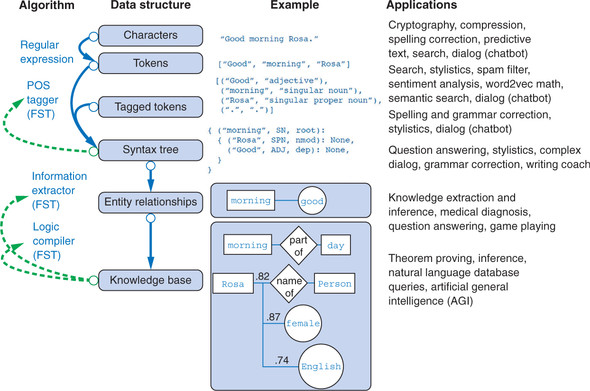

- **상위 2개 층**은 주어진 단어의 품사(POS)를 말해주는 품사 tag를 자동으로 생성. **Parsing 단계.**
    - 품사 태깅은 nltk.tag 같은 FST로 수행.
- **하위 2개 층**은 특정 영역에 관한 정보(지식)를 담은 DB를 채우는데 사용. **Analysis 단계.**
- **모든 6개 층을 이용**해 특정 문장/문서에서 **추출한 정보를 DB의 정보와 결합해 추론을 수행**할 수 있음.
    - 이런 지식 베이스가 없어도 챗봇 같은 경우는 상위 몇 층의 알고리즘 만으로 합리적 결정이 가능.